In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro
import seaborn as sns

In [2]:
# Import Dataset to a dataframe
df = pd.read_csv('weather.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [3]:
# Find number of unique values in the description column
levels = len(pd.value_counts(df['Description']))

print(f'There are {levels} in the Description column')

There are 3 in the Description column


In [4]:
# Create frame with n-1 levels of Description
df_dummies = pd.get_dummies(df, drop_first=True)

print(f'There are {df_dummies.shape[1]} columns in df_dummies')

There are 9 columns in df_dummies


In [5]:
# Shuffle data
df_shuffled = shuffle(df_dummies, random_state=42)

In [6]:
# Split into features and targets
dependent_var = 'Temperature_c'
x_values = df_shuffled.drop(dependent_var, axis=1)
y_values = df_shuffled[dependent_var]

In [7]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_values, 
                                                    y_values, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [8]:
# Create linear regression model
lr_model = LinearRegression()

# Fit model to the Humidity column
lr_model.fit(x_train[['Humidity']], y_train)

LinearRegression()

In [9]:
# Find intercept and coefficient
intercept = lr_model.intercept_
coefficient = lr_model.coef_

print(f'Temperature = {intercept:0.2f} + ({coefficient[0]:0.2f} * Humidity)')


Temperature = 34.50 + (-30.69 * Humidity)


In [10]:
print(f'By this untested model, a day with a 0.78 humidity index would be about {intercept + coefficient[0] * 0.78:0.2f} degrees Celsius')


By this untested model, a day with a 0.78 humidity index would be about 10.56 degrees Celsius


In [11]:
# Create a set of predictions from the test data
predictions = lr_model.predict(x_test[['Humidity']])

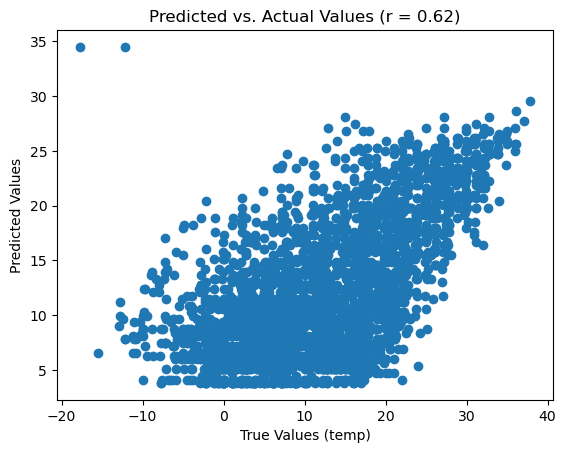

In [12]:
# Create a scatter plot of predicted values vs. true values
plt.scatter(y_test, predictions)
plt.xlabel('True Values (temp)')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs. Actual Values (r = {pearsonr(y_test, predictions)[0]:0.2f})')
plt.show()

### ***Note: distplot is depricated. Use histplot or displot instead***

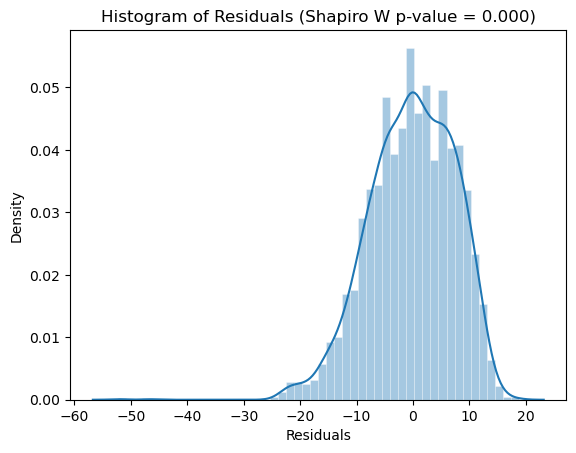

In [13]:
# Plot a histogram of residuals. A model that fits the data well
# will have normally distributed residuals.
sns.histplot((y_test - predictions),
            kde=True, 
            stat='density', 
            kde_kws=dict(cut=3),
            alpha=0.4,
            edgecolor=(1, 1, 1, 0.4),
            bins=50
           )
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title(f'Histogram of Residuals' \
          + f' (Shapiro W p-value = '\
          + f'{shapiro(y_test - predictions)[1]:0.3f})')
plt.show()

In [14]:
# Compute mean abs error, mean squared error,
# root mean squared error, and R-squared 
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE',
                                      'RMSE',
                                      'R-Squared'
                                     ],
                           'Value': [metrics.mean_absolute_error(y_test, predictions),
                                     metrics.mean_squared_error(y_test, predictions),
                                     np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                     metrics.explained_variance_score(y_test, predictions)
                                    ]
                          }).round(3)

metrics_df

,Metric,Value
0,MAE,6.052
1,MSE,56.187
2,RMSE,7.496
3,R-Squared,0.389


## Multiple Linear Regression

In [15]:
# Create a new linear regression model
lr_model = LinearRegression()

# And fit model to the training data again, but use all feature columns
lr_model.fit(x_train, y_train)

LinearRegression()

In [16]:
# Get intercept and coeffs
intercept = lr_model.intercept_

coefficients = lr_model.coef_
# Name the coefficents
[humidity_co, wind_sp_co,
 wind_bearing_co, visiblity_co,
 pressure_co, rain_co,
 normal_weather_co, warm_weather_co
] = coefficients

print(f'Temperature = {intercept:0.2f} + ({humidity_co:0.2f} * Humidity)'
      + f'\n\t+ ({wind_sp_co:0.2f} * Wind Speed) + ({wind_bearing_co:0.2f} * Wind Bearing Degrees)'
      + f'\n\t+ ({visiblity_co:0.2f} * Visiblity) + ({pressure_co:0.2f} * Pressure)'
      + f'\n\t+ ({rain_co:0.2f} * Rain) + ({normal_weather_co:0.2f} * Normal Weather)'
      + f'\n\t+ ({warm_weather_co:0.2f} * Warm Weather)'
     )

Temperature = 3.54 + (-7.93 * Humidity)
	+ (-0.07 * Wind Speed) + (0.00 * Wind Bearing Degrees)
	+ (0.06 * Visiblity) + (0.00 * Pressure)
	+ (5.61 * Rain) + (8.54 * Normal Weather)
	+ (19.10 * Warm Weather)
